# Lin, Chen, Tsai

## import

In [1]:
import h5py
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from autorank import autorank, plot_stats
#from scipy import stats
from scipy import signal
#import seaborn as sns

np.set_printoptions(suppress=True)

#local Libraries
from utils import *
from videoUtil import *
from errorUtil import *
from algorithms2 import *
from assessment2 import *
from assessment2 import StatAnalysisTest


In [2]:
value = ["MAE", "RMSE","PCC","CCC", "processTime"]
value2 = ["MAE", "RMSE","PCC","CCC"]
type = ["Farneback", "LK_d", "tvl1", "DIS","DIS_UF","deepflow", "RLOF", "PCA"]
type = ["Farneback", "LK_d", "DIS","DIS_UF","deepflow", "RLOF", "PCA","tvl1"] 
type2 = ["Farneback", "LK_d", "DIS","DIS_UF"] 
database=["cohface", "bp4d"]

## Assessment on Cohface and BP4D+

In [ ]:
#%%capture output
#"C:\Users\fede2\OneDrive\Documenti\università\tirocinio\Tesi_Castrovinci-main\cohface\1\0\data.avi"
#path = r"C:\Users\fede2\OneDrive\Documenti\università\tirocinio\Tesi_Castrovinci-main\cohface"
path = r'C:\Users\Federico\Downloads\wetransfer_tesi_castrovinci-main\Tesi_Castrovinci-main\cohface - Copia'


of=[""]
for type in of:
    print("Optical flow --> ",type,"\n")
    compute_lin_errors(path, dataset='cohface', of_type= type)#....of_type

In [ ]:
path = r"C:\\Users\\fede2\\OneDrive\Documenti\\università\\tirocinio\\Tesi_Castrovinci-main\\"
for types in type:
    print("Optical flow --> ",type,"\n", database[0])
    compute_lin_errors_sig(path, database[0],types)

# CONFRONTO TRA ALGORITMI

## violin graph

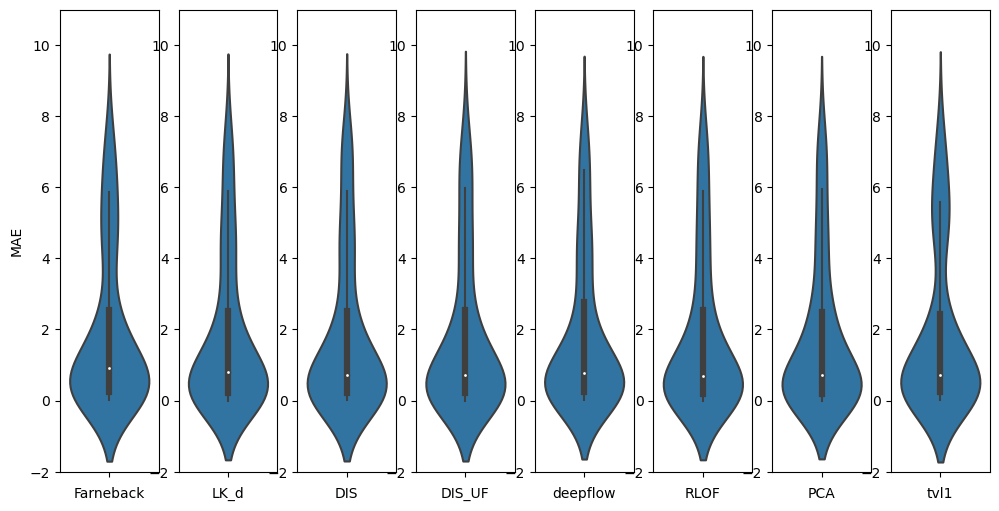

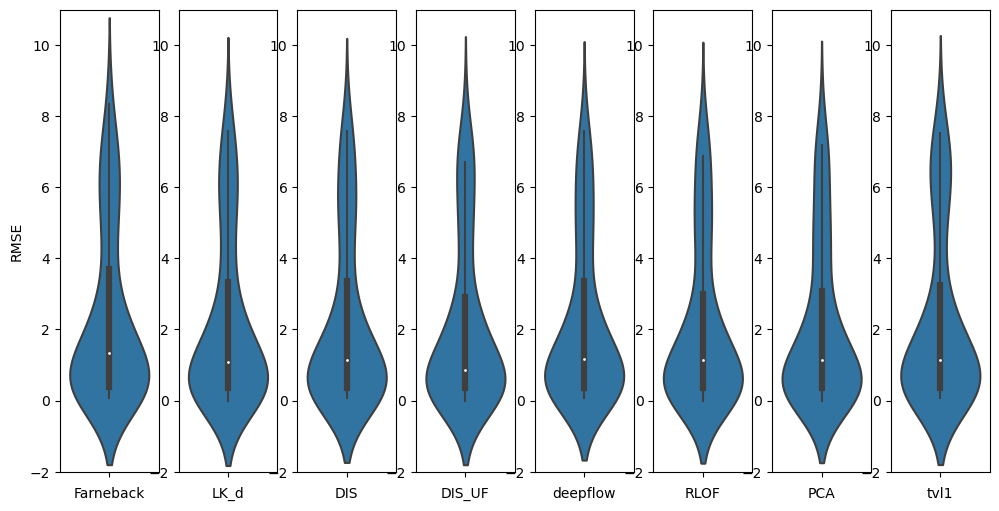

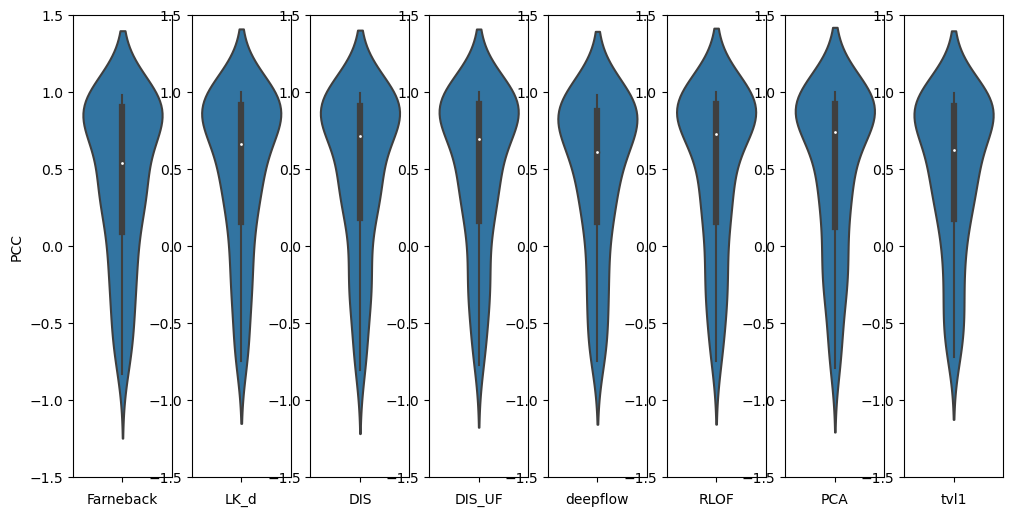

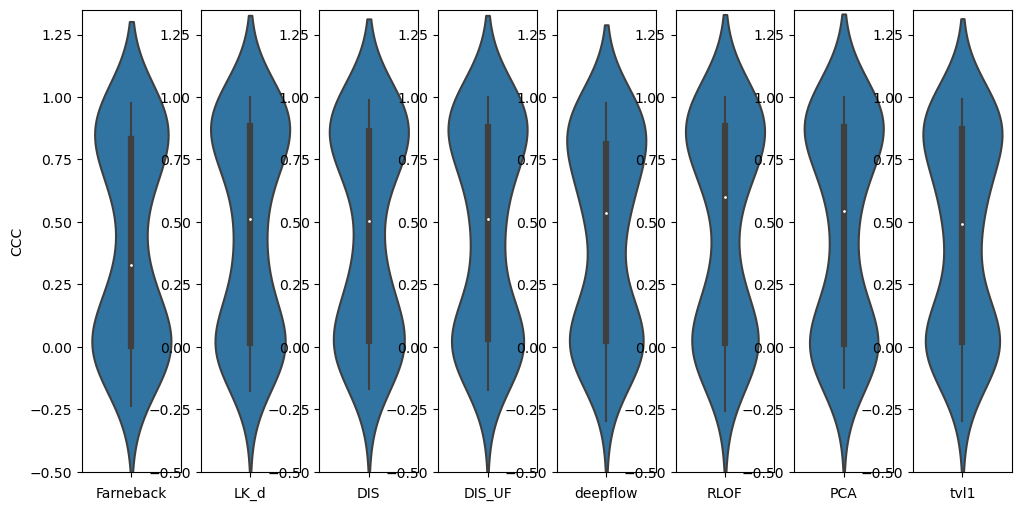

In [64]:
#comparison_Vgraph(database[0], type, value)
comparison_Vgraph_sig(database[0], type, value2)

## Regression plot

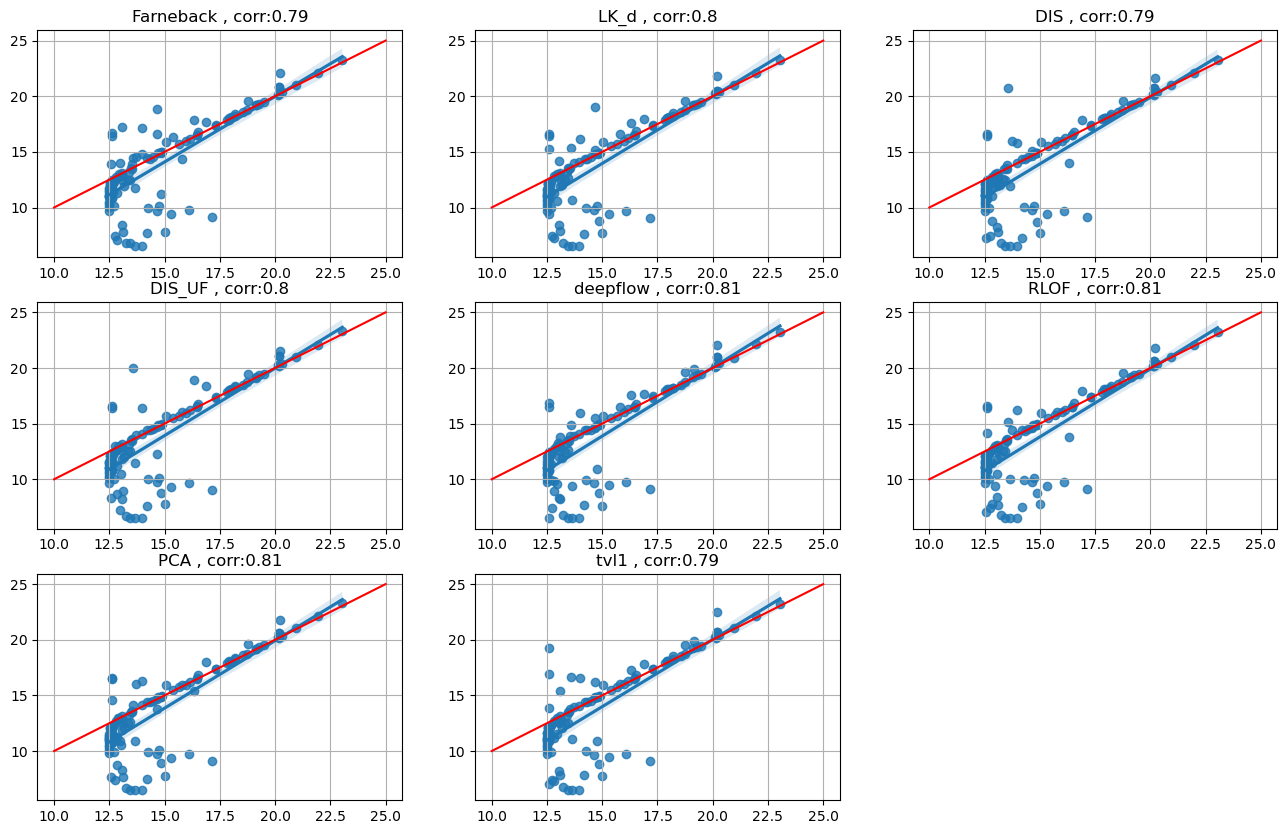

In [6]:
#comparison_Regplot(database[1], type, value)
comparison_Regplot_sig(database[0], type, value)

## Tempo di esecuzione

<AxesSubplot:title={'center':'tempo medio per frame'}>

<Figure size 1600x1000 with 0 Axes>

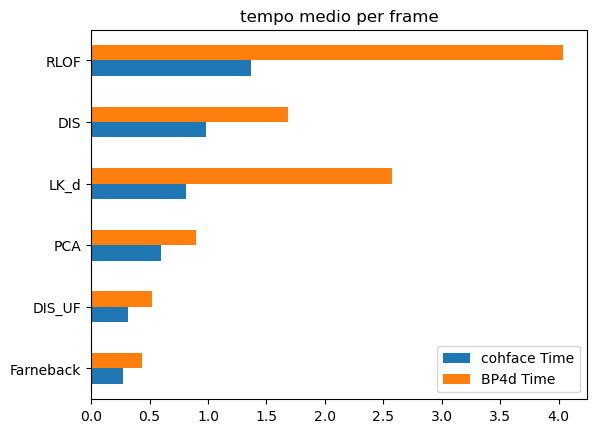

In [61]:
#autorank x=GT y=gt-es
type2 = ["Farneback","DIS_UF", "PCA", "LK_d", "DIS", "RLOF", "tvl1", "deepflow"] 
type3 = ["Farneback","DIS_UF", "PCA", "LK_d", "DIS", "RLOF"] 
type4 = ["Farneback","DIS_UF", "PCA"] 

plt.figure(figsize=(16, 10))
#mae=[]rmse=[]pcc=[]ccc=[]
pt1=[]
pt2=[]

for method in type3:
        df1 = pd.read_hdf("Results\\"+database[0]+"_res_lin_"+method+".h5", key="df")
        #mae.append("MAE = " + str(round(float(np.nanmean(df["MAE"])), 5)))
        #rmse.append("RMSE = " + str(round(float(np.nanmean(df["RMSE"])), 5)))
        #pcc.append("PCC = " + str(round(float(np.nanmean(df["PCC"])), 5)))
        #ccc.append("CCC = " + str(round(float(np.nanmean(df["CCC"])), 5)))
        pt1.append(round(float(np.nanmean(df1["processTime"])), 5))
        df2 = pd.read_hdf("Results\\"+database[1]+"_res_lin_"+method+".h5", key="df")
        pt2.append(round(float(np.nanmean(df2["processTime"])), 5))


#dati={'opticalflow':type, "MAE":mae,"RMSE":rmse,"PCC":pcc,"CCC":ccc,"processTime": pt}
dati={'opticalflow':type3,
      #"mae": mae,
      #"rmse":rmse,
      #"pcc":pcc,
      #"ccc": ccc,
      "cohface Time": pt1,
      "BP4d Time": pt2}

Y_df = pd.DataFrame({"cohface Time": pt1, "BP4d Time": pt2}, type3)
Y_df.plot.barh(rot=0, title='tempo medio per frame')

## Auto Rank

<Figure size 1600x1000 with 0 Axes>

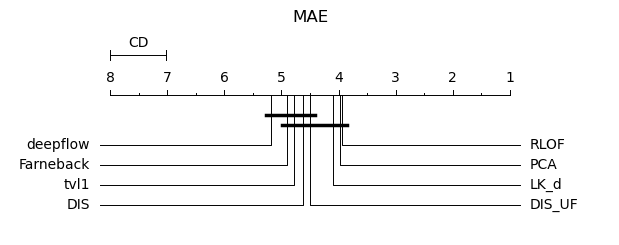

RankResult(rankdf=
           meanrank    median       mad  ci_lower  ci_upper effect_size  \
RLOF       3.942478  0.694444  0.597222  0.277778  1.902778         0.0   
PCA        3.969027  0.708333  0.622619  0.285714       2.0   -0.015356   
LK_d       4.106195  0.815789  0.690789  0.285714  1.902778   -0.126755   
DIS_UF     4.500000  0.722222  0.619281  0.271429     1.875   -0.030798   
DIS        4.615044  0.708333  0.597222  0.271429  1.888889   -0.015686   
tvl1       4.778761  0.708333  0.597222  0.333333  1.743243   -0.015686   
Farneback  4.898230  0.918919  0.766141  0.342857  2.041667   -0.220421   
deepflow   5.190265  0.785714  0.628571  0.333333  1.914286   -0.100409   

            magnitude  
RLOF       negligible  
PCA        negligible  
LK_d       negligible  
DIS_UF     negligible  
DIS        negligible  
tvl1       negligible  
Farneback       small  
deepflow   negligible  
pvalue=9.544939070193942e-05
cd=0.9876824842509052
omnibus=friedman
posthoc=nemenyi
all_n

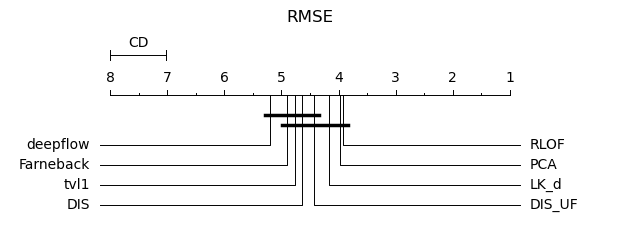

RankResult(rankdf=
           meanrank    median       mad  ci_lower  ci_upper effect_size  \
RLOF       3.929204  1.149534  0.910488  0.408248  2.363861         0.0   
PCA        3.973451  1.146423  0.910721  0.399653  2.349526    0.002304   
LK_d       4.168142  1.082152  0.843106  0.430946   2.35527    0.051797   
DIS_UF     4.433628  0.853913  0.646893  0.422577  2.250397    0.252472   
DIS        4.637168  1.133893  0.887295  0.424918  2.382975    0.011735   
tvl1       4.761062  1.152637  0.881789  0.532714  2.297178   -0.002335   
Farneback  4.893805  1.322876  1.018151       0.5  2.765863   -0.121055   
deepflow   5.203540  1.171080  0.878649  0.520988  2.358495   -0.016243   

            magnitude  
RLOF       negligible  
PCA        negligible  
LK_d       negligible  
DIS_UF          small  
DIS        negligible  
tvl1       negligible  
Farneback  negligible  
deepflow   negligible  
pvalue=0.00014571970715243735
cd=0.9876824842509052
omnibus=friedman
posthoc=nemenyi
all_

<Figure size 1600x1000 with 0 Axes>

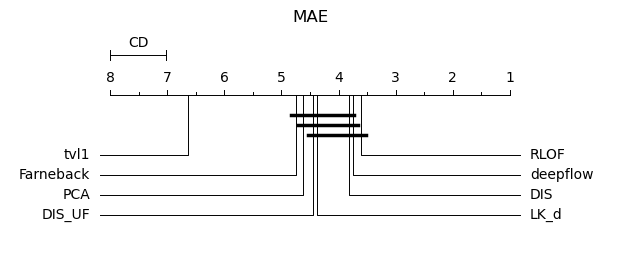

RankResult(rankdf=
           meanrank    median       mad  ci_lower  ci_upper effect_size  \
RLOF       3.606195  0.628205  0.556777  0.132653  2.138889         0.0   
deepflow   3.738938  0.510417  0.438988  0.153061  2.011905    0.158465   
DIS        3.823009  0.530612  0.459184  0.153061  1.796748    0.128989   
LK_d       4.380531  0.597222  0.527778  0.163265   2.44898    0.038523   
DIS_UF     4.455752  0.704082  0.642857  0.163265      2.53   -0.085104   
PCA        4.619469  0.666667  0.597222  0.163265  2.469388   -0.044933   
Farneback  4.747788  0.700000  0.628571  0.166667  2.459184   -0.081556   
tvl1       6.628319  2.562500  2.419643      0.35  5.142857    -0.74312   

            magnitude  
RLOF       negligible  
deepflow   negligible  
DIS        negligible  
LK_d       negligible  
DIS_UF     negligible  
PCA        negligible  
Farneback  negligible  
tvl1           medium  
pvalue=3.5181323310082686e-25
cd=0.9876824842509052
omnibus=friedman
posthoc=nemenyi
all_

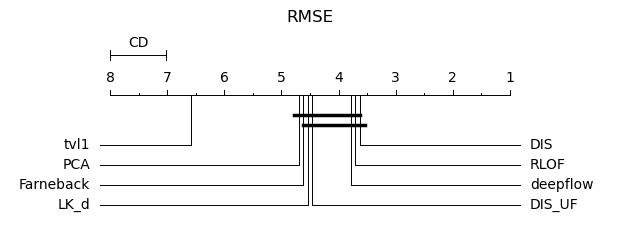

RankResult(rankdf=
           meanrank    median       mad  ci_lower  ci_upper effect_size  \
DIS        3.623894  0.850857  0.674081  0.276642  3.315578         0.0   
RLOF       3.707965  0.877346  0.717627  0.257539  4.220064   -0.025663   
deepflow   3.774336  0.870026  0.681043  0.276642  3.282607   -0.019081   
DIS_UF     4.460177  1.045825  0.886106  0.285714  4.774935   -0.167039   
LK_d       4.539823  0.931891  0.755114  0.294508  4.385942   -0.076363   
Farneback  4.615044  1.124405  0.938066   0.29277  4.447057   -0.225885   
PCA        4.690265  1.000000  0.825036  0.294508  4.706379   -0.133531   
tvl1       6.588496  4.189935  3.922674  0.612372  8.823959   -0.800232   

            magnitude  
DIS        negligible  
RLOF       negligible  
deepflow   negligible  
DIS_UF     negligible  
LK_d       negligible  
Farneback       small  
PCA        negligible  
tvl1            large  
pvalue=1.568930282659789e-24
cd=0.9876824842509052
omnibus=friedman
posthoc=nemenyi
all_n

In [6]:
#comparison_AutoRankplot(database[0], type, value2)
#comparison_AutoRankplot_time(database[0], type, value2)
order="ascending"
#order="descending"
comparison_AutoRankplot_sig(database[0], type, ["MAE", "RMSE"], order)
comparison_AutoRankplot_sig(database[1], type, ["MAE", "RMSE"], order)

## BOX PLOT errori

In [19]:
metric = value[1]
for method in type:
    x = StatAnalysisTest("Results_sig\\"+database[0]+"_res_lin_"+method+".h5")
    fig = x.displayBoxPlot(metric=metric, scale="linear")
    #print(x.displayBoxPlot(metric=metric, scale="linear").layout.title.text)
    if method == "":
        method = "_default"
    print(method)
    fig.show()


Farneback


LK_d


DIS


DIS_UF


deepflow


RLOF


PCA


tvl1


# STAMPO I RISULTATI COME TABELLA

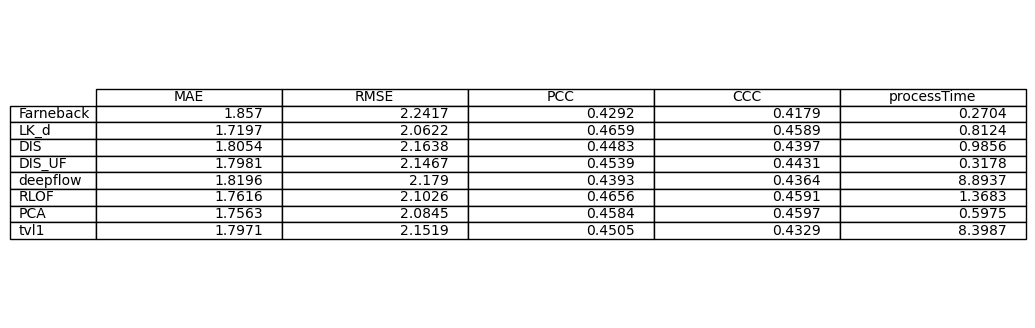

In [9]:
comparison_table(database[0], type, value)
#comparison_table_sig(database[0], type, value2)

## Bland Altman

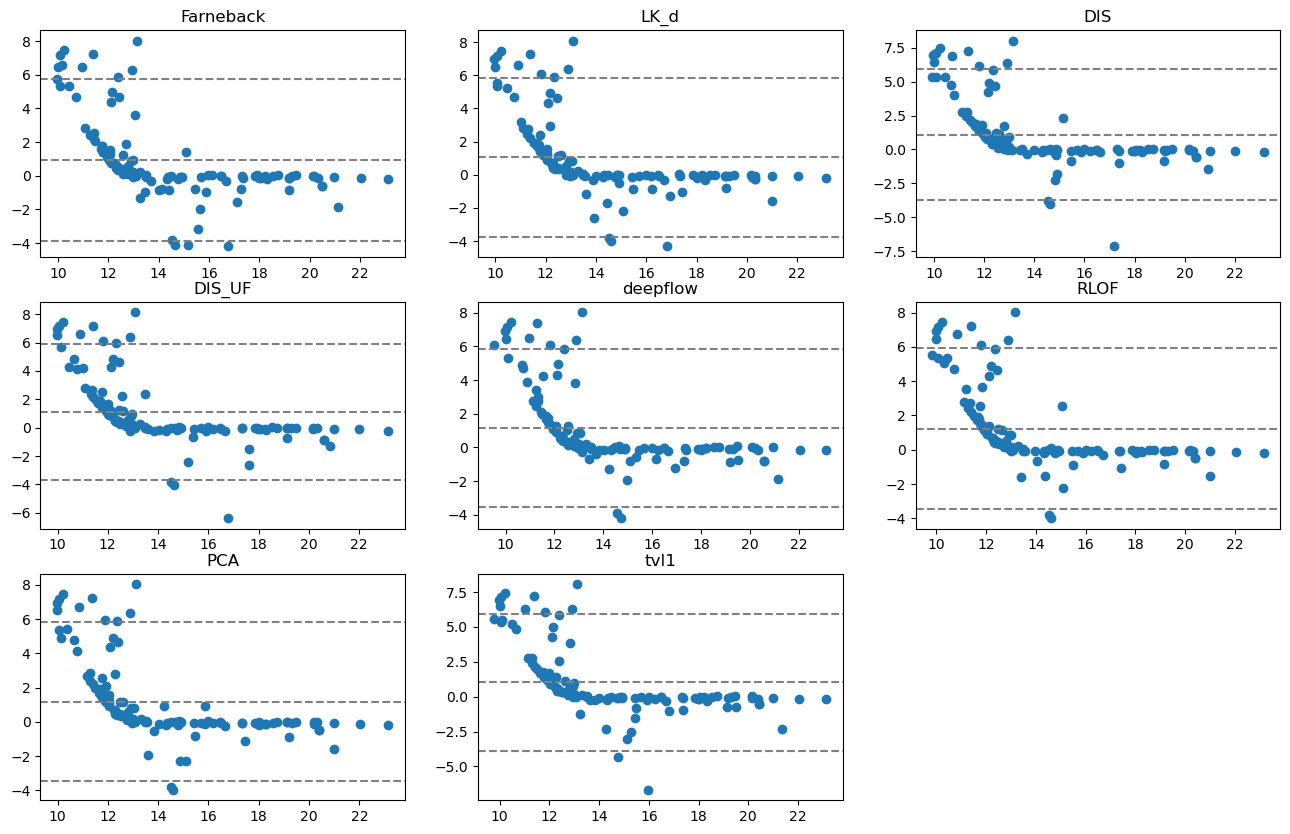

In [19]:
bland_altman(database[1], type)
bland_altman_sig(database[0], type)

In [ ]:
def OFmagVisualization(flow):
  mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1])
  return mag

def plot_quiver(ax, flow, spacing, margin=0, **kwargs):
    """Plots less dense quiver field.

    Args:
        ax: Matplotlib axis
        flow: motion vectors
        spacing: space (px) between each arrow in grid
        margin: width (px) of enclosing region without arrows
        kwargs: quiver kwargs (default: angles="xy", scale_units="xy")
    """
    h, w, *_ = flow.shape

    nx = int((w - 2 * margin) / spacing)
    ny = int((h - 2 * margin) / spacing)

    x = np.linspace(margin, w - margin - 1, nx, dtype=np.int64)
    y = np.linspace(margin, h - margin - 1, ny, dtype=np.int64)

    flow = flow[np.ix_(y, x)]
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    kwargs = {**dict(angles="xy", scale_units="xy"), **kwargs}
    ax.quiver(x, y, u, v, **kwargs)

    ax.set_ylim(sorted(ax.get_ylim(), reverse=True))
    ax.set_aspect("equal")


def  OFvisualization(flow):
  #for visualization purpose, create a hsv frame of the same dimension as the rgb frame
  hsv = np.zeros_like(frame1)

  #set the saturation to 255
  hsv[:,:,1] = 255 
  mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1])
    
  hsv[:,:,0] = ang*180/np.pi/2
  hsv[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
  rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
  
  return rgb



#FLAG TO CHOOSE THE VISUALIZATION MODE
visualization = 2 #0:intensity, 1:colors, 2:vectors
path = r'C:\Users\fede2\OneDrive\Documenti\università\tirocinio\Tesi_Castrovinci-main\cohface\1\0\data.avi'
#path = r'C:\Users\fede2\OneDrive\Documenti\università\tirocinio\Tesi_Castrovinci-main\Datasets_utils\vid.avi'
cap = cv2.VideoCapture(path)

# read the first video frame
ret, frame1 = cap.read()

#convert it to gray levels
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
 

#create an output video:
h,w,d = frame1.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter( r'C:\Users\fede2\OneDrive\Documenti\università\tirocinio\Tesi_Castrovinci-main\Datasets_utils\output.avi',fourcc, 20.0, (w,h))

#list to save the OF result, frame by frame for interactive visualization
if visualization ==0:
  I = []
elif visualization ==1:
  colors = []

#START VIDEO PROCESSING: 

#ALTERNATIVE 1: to process the whole video:
#ret = True
#while ret:

#ALTERNATIVE 2: to process only the first N  frames:
i=20;
N = 40;

Farneback_params = dict(pyr_scale = 0.5,
                            levels = 3,
                            winsize = 15,
                            iterations = 3,
                            poly_n = 5,
                            poly_sigma = 1.1,
                            flags = 0)
while i<N:
    i += 1 
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    
    # Farneback OF
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, **Farneback_params)
    
    if visualization ==0:
      intensity = OFmagVisualization(flow)
      I.append(intensity)
    elif visualization ==1:
      #visualization via colors:
      rgb = OFvisualization(flow)
      out.write(rgb)
      colors.append(rgb)
    else:
      #visualization of vectors
      fig, ax = plt.subplots()
      plot_quiver(ax, flow, spacing=10, scale=1, color="#ff44ff")
    
 
    prvs = next.copy()
if visualization ==0:
  showVideo(I)
elif visualization ==1:
  showVideo(colors)

cap.release()
out.release() 

# Example on Cohface

In [14]:
data = pd.read_hdf("Results\cohface_res_lin_Farneback.h5")
#data.sort_values(by=['CCC'], ascending=False)['CCC']
#data[data['videoFilename']=="/var/datasets/VHR1/cohface/data/6/0/data.avi"]['CCC']
#data.iloc[14]

In [59]:
#%%capture output
path = r"C:\Users\fede2\OneDrive\Documenti\università\tirocinio\Tesi_Castrovinci-main\cohface\1\1"
#path = r'C:\Users\Federico\Downloads\wetransfer_tesi_castrovinci-main\Tesi_Castrovinci-main\cohface - Copia\1\1'
#sig = lin(path+"\data.avi", "cohface", "RLOF")
sig = lin(path+"\data.avi", "cohface", "Farneback")

100% complete

<b>Estimated signal and spectrum

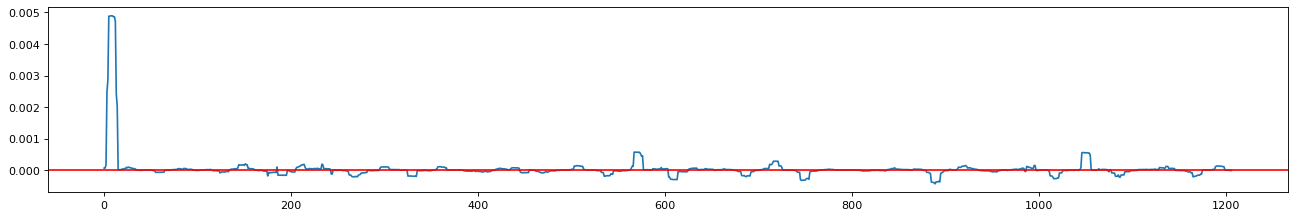

In [217]:
plt.figure(figsize=(20, 3), dpi=80)
plt.plot(sig)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

In [218]:
fps = get_fps(path+"\data.avi")

video = cv2.VideoCapture(path+"\data.avi")
frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frames / fps
win_size = 27 #cohface estimation
nyquistF = fps/2 
fRes = 0.01
nFFT = max(2048, (60*2*nyquistF) / fRes)

minF = 0.1 
maxF = 0.4

print("fps - ", fps)
print("frames - ", frames, "\nduration - ", duration)

fps -  20.0
frames -  1207.0 
duration -  60.35


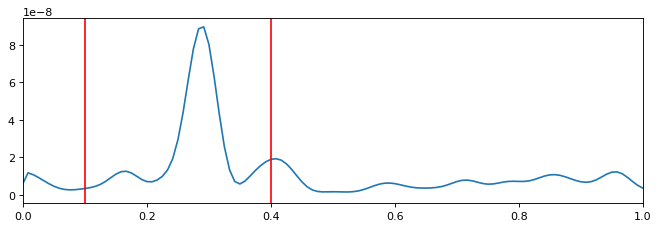

Max frequency: 0.2916666666666667 Hz,  17.5 resp/min


In [219]:
plt.figure(figsize=(10, 3), dpi=80)
F, P = signal.welch(sig, nperseg=win_size*fps, noverlap=fps*(win_size-1), fs=fps, nfft=nFFT)
plt.plot(F,P)
plt.axvline(x=0.1, ymin=0, ymax=1, c='r')
plt.axvline(x=0.4, ymin=0, ymax=1, c='r')
plt.xlim([0,1])
plt.show()
print("Max frequency:", F[np.argmax(P)], "Hz, ", F[np.argmax(P)]*60, "resp/min")

In [220]:
nperseg = fps * win_size
#pad signal
sig = even_ext(np.array(sig), int(nperseg//2), axis=-1)


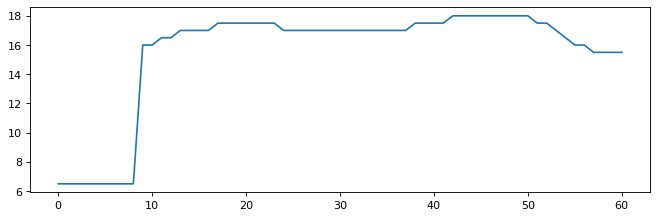

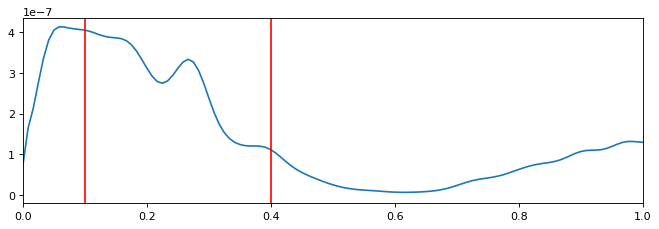

Max frequency: 0.058333333333333334 Hz,  3.5 resp/min


In [221]:
#BVP_windowing: pyVHR/pyVHR/utils/errors.py 
sig_win, times = BVP_windowing(sig, win_size, fps, stride=1)
times = times - times[0]
rpm = sig_to_RPM(sig_win, fps, win_size, nFFT, minHz=minF, maxHz=maxF)
rpm = signal.medfilt(rpm, kernel_size=3)

plt.figure(figsize=(10, 3), dpi=80)
plt.plot(times, rpm)
plt.figure(figsize=(10, 3), dpi=80)
F, P = signal.welch(sig, nperseg=win_size*fps, noverlap=fps*(win_size-1), fs=fps, nfft=nFFT)
plt.plot(F,P)
plt.axvline(x=0.1, ymin=0, ymax=1, c='r')
plt.axvline(x=0.4, ymin=0, ymax=1, c='r')
plt.xlim([0,1])
plt.show()
print("Max frequency:", F[np.argmax(P)], "Hz, ", F[np.argmax(P)]*60, "resp/min")
plt.show()

In [ ]:
nperseg = fps * win_size
#pad signal
sig = even_ext(np.array(sig), int(nperseg//2), axis=-1)

In [ ]:
#BVP_windowing: pyVHR/pyVHR/utils/errors.py 
sig_win, times = BVP_windowing(sig, win_size, fps, stride=1)
times = times - times[0]
rpm = sig_to_RPM(sig_win, fps, win_size, nFFT, minHz=minF, maxHz=maxF)
rpm = signal.medfilt(rpm, kernel_size=3)

plt.figure(figsize=(10, 3), dpi=80)
plt.plot(times, rpm)
plt.show()

<b> Ground Truth

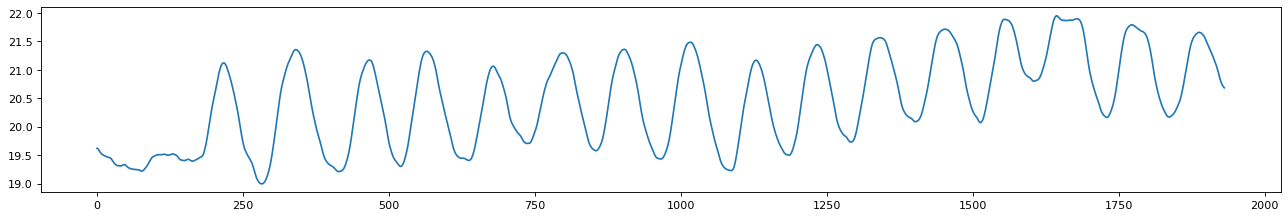

In [205]:
fps_gt = 32
nyquistF_gt = fps_gt/2
nFFT_gt = max(2048, (60*2*nyquistF_gt) / fRes)

f = h5py.File(path+'/data.hdf5', 'r')
gt = np.array(f['respiration'])
gt = gt[np.arange(0, len(gt),8)]
gt_sig = RWsignal(gt, fps_gt)
plt.figure(figsize=(20, 3), dpi=80)
plt.plot(gt)
plt.show()

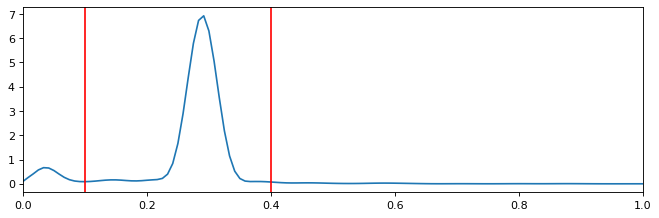

Max frequency: 0.2916666666666667 Hz,  17.5 resp/min


In [206]:
plt.figure(figsize=(10, 3), dpi=80)
F, P = signal.welch(gt, nperseg=win_size*fps_gt, noverlap=fps_gt*(win_size-1), fs=fps_gt, nfft=nFFT_gt)
plt.plot(F,P)
plt.axvline(x=0.1, ymin=0, ymax=1, c='r')
plt.axvline(x=0.4, ymin=0, ymax=1, c='r')
plt.xlim([0,1])
plt.show()
print("Max frequency:", F[np.argmax(P)], "Hz, ", F[np.argmax(P)]*60, "resp/min")

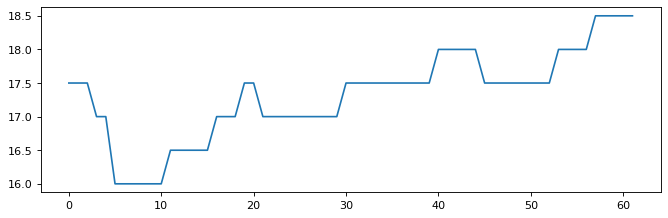

In [207]:
#gt_rpm, gt_times = gt_sig.getRPM(winsize=duration/1.5)
gt_rpm, gt_times = gt_sig.getRPM(winsize=27)
gt_rpm = signal.medfilt(gt_rpm, kernel_size=3)

plt.figure(figsize=(10, 3), dpi=80)
plt.plot(gt_rpm)
plt.show()

<b> Summary

In [222]:
padding = int(win_size//2)
gt_times = gt_times[padding:-padding-1]
gt_times-=gt_times[0]
times = times[padding:-padding]
times-=times[0]
rpm = rpm[padding:-padding]
gt_rpm = gt_rpm[padding:-padding-1]

In [1]:
def get_SNR(bvp, fps, reference_hrs, timesES):
    '''Computes the signal-to-noise ratio of the BVP
    signals according to the method by -- de Haan G. et al., IEEE Transactions on Biomedical Engineering (2013).
    SNR calculated as the ratio (in dB) of power contained within +/- 0.1 Hz
    of the reference heart rate frequency and +/- 0.2 of its first
    harmonic and sum of all other power between 0.5 and 4 Hz.
    Adapted from https://github.com/danmcduff/iphys-toolbox/blob/master/tools/bvpsnr.m
    '''
    '''BVP = A BVP timeseries.
        FS = The sample rate of the BVP time series (Hz/fps).
        HR = The reference heart rate (Hz/fps).
        PlotTF = Boolean to turn plotting results on or off.'''
   
    interv1 = 0.2*60
    interv2 = 0.2*60
    NyquistF = fps/2.;
    FResBPM = 0.5
    nfft = np.ceil((60*2*NyquistF)/FResBPM)
    SNRs = []
    
    curr_ref = reference_hrs[int(timesES)]
    pfreqs, power = Welch(bvp, fps, nfft=nfft)
    GTMask1 = np.logical_and(pfreqs>=curr_ref-interv1, pfreqs<=curr_ref+interv1)
    GTMask2 = np.logical_and(pfreqs>=(curr_ref*2)-interv2, pfreqs<=(curr_ref*2)+interv2)
    GTMask = np.logical_or(GTMask1, GTMask2)
    FMask = np.logical_not(GTMask)
    for i in range(len(power)):
        p = power[i,:]
        SPower = np.sum(p[GTMask])
        allPower = np.sum(p[FMask])
        snr = 10*np.log10(SPower/allPower)
    SNRs.append(snr)
    return np.array([np.mean(SNRs)])
def Welch(bvps, fps, minHz=0.65, maxHz=4.0, nfft=2048):
    """
    This function computes Welch'method for spectral density estimation.

    Args:
        bvps(flaot32 numpy.ndarray): BVP signal as float32 Numpy.ndarray with shape [num_estimators, num_frames].
        fps (float): frames per seconds.
        minHz (float): frequency in Hz used to isolate a specific subband [minHz, maxHz] (esclusive).
        maxHz (float): frequency in Hz used to isolate a specific subband [minHz, maxHz] (esclusive).
        nfft (int): number of DFT points, specified as a positive integer.
    Returns:
        Sample frequencies as float32 numpy.ndarray, and Power spectral density or power spectrum as float32 numpy.ndarray.
    """
    _, n = bvps.shape
    if n < 256:
        seglength = n
        overlap = int(0.8*n)  # fixed overlapping
    else:
        seglength = 256
        overlap = 200
    # -- periodogram by Welch
    F, P = welch(bvps, nperseg=seglength, noverlap=overlap, fs=fps, nfft=nfft)
    F = F.astype(np.float32)
    P = P.astype(np.float32)
    # -- freq subband (0.65 Hz - 4.0 Hz)
    band = np.argwhere((F > minHz) & (F < maxHz)).flatten()
    Pfreqs = 60*F[band]
    Power = P[:, band]
    return Pfreqs, Power


In [271]:
es_rpm=np.expand_dims(rpm, axis=0)

RMSE = RMSEerror(np.expand_dims(rpm, axis=0), gt_rpm, times, gt_times)
MAE = MAEerror(np.expand_dims(rpm, axis=0), gt_rpm, times, gt_times)
MAX = MAXError(np.expand_dims(rpm, axis=0), gt_rpm, times, gt_times)
PCC = PearsonCorr(np.expand_dims(rpm, axis=0), gt_rpm, times, gt_times)
CCC = LinCorr(np.expand_dims(rpm, axis=0), gt_rpm, times, gt_times)
#SNR = get_SNR(sig, fps_gt, gt_rpm, times)
#SNR = snr(sig, fps_gt, fps*win_size, fps*(win_size-1))

RMSE, MAE, MAX, PCC, CCC

(array([0.37796447]),
 array([0.28571429]),
 array([0.5]),
 array([0.31316438]),
 array([0.20814477]),
 0.35410719926909845)

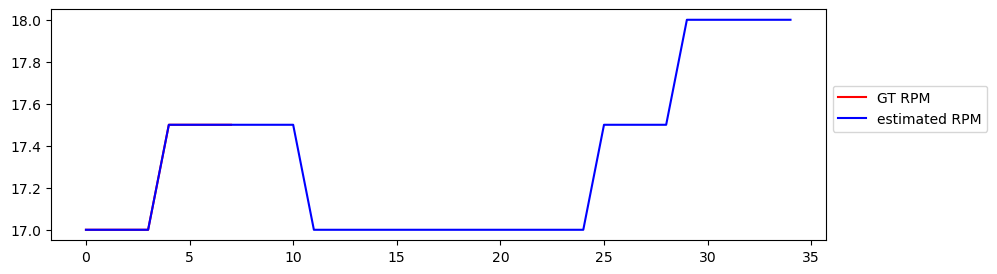

In [240]:
#figure(figsize=(10, 3), dpi=80)
plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
ax.plot(gt_times, gt_rpm, c='r', label='GT RPM')
ax.plot(times, rpm, c='b', label='estimated RPM')
leg = ax.legend(bbox_to_anchor =(1, 0.7))
plt.show()

## Example on BP4D+

In [10]:
data = pd.read_hdf('Results/bp4d_res_lin_Farneback.h5')
np.argmax(data['CCC'])
data.iloc[2]

method                                                         Lin
dataset                                                       bp4d
videoIdx                                                         2
sigFilename                                                       
videoFilename    /mnt/43fba879-48e4-4e4c-afb2-dcb7e861c868/sftp...
EVM                                                          False
mask                                                              
RMSE                                          [14.928752361092455]
MAE                                           [13.264705882352942]
PCC                                           [0.8519956424105944]
MAX                                                         [21.0]
telapse                                                           
bpmGT                                                             
bpmES                                                             
timeGT           [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,

In [12]:
# %%capture output
path = "Datasets_utils\\vid.avi"
sig = lin(path, "bp4d", "Farneback")

100% complete

In [13]:
path_gt = "Datasets_utils\\"

<b>Estimated signal and spectrum

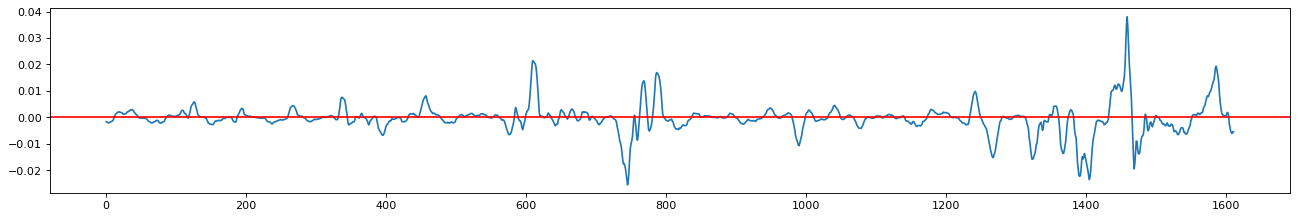

In [14]:
plt.figure(figsize=(20, 3), dpi=80)
plt.plot(sig)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

In [15]:
fps = 25
win_size = 27 #bp4d estimation
nyquistF = fps/2
fRes = 0.5
nFFT = max(2048, (60*2*nyquistF) / fRes)
minF = 0
maxF = 200/55
# default maxF = 200/60

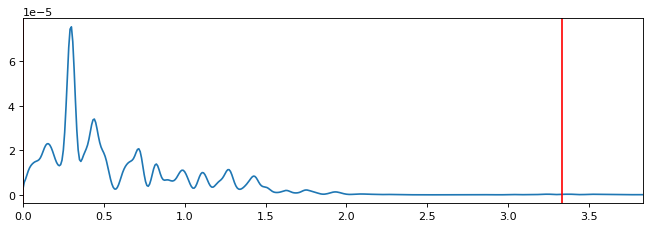

Max frequency: 0.3 Hz,  18.0 resp/min


In [16]:
plt.figure(figsize=(10, 3), dpi=80)
F, P = signal.welch(sig, nperseg=win_size*fps, noverlap=fps*(win_size-1), fs=fps, nfft=nFFT)
plt.plot(F,P)
plt.axvline(x=minF, ymin=0, ymax=1, c='r')
plt.axvline(x=maxF, ymin=0, ymax=1, c='r')
plt.xlim([0,maxF+0.5])
plt.show()
print("Max frequency:", F[np.argmax(P)], "Hz, ", F[np.argmax(P)]*60, "resp/min")

In [17]:
nperseg = fps * win_size
#pad signal
sig = even_ext(np.array(sig), int(nperseg//2), axis=-1)

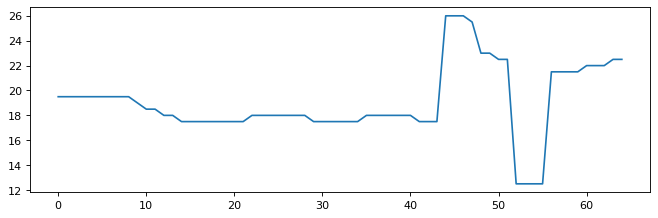

In [18]:
#BVP_windowing: pyVHR/pyVHR/utils/errors.py 
sig_win, times = BVP_windowing(sig, win_size, fps, stride=1)
times = times - times[0]
rpm = sig_to_RPM(sig_win, fps, win_size, nFFT, minHz=minF, maxHz=maxF)
rpm = signal.medfilt(rpm, kernel_size=3)

plt.figure(figsize=(10, 3), dpi=80)
plt.plot(times, rpm)
plt.show()

<b> Ground Truth

In [19]:
fps_gt = 1000.
nyquistF_gt = fps_gt/2
nFFT_gt = max(2048, (60*2*nyquistF_gt) / fRes)

<u> Preprocessing

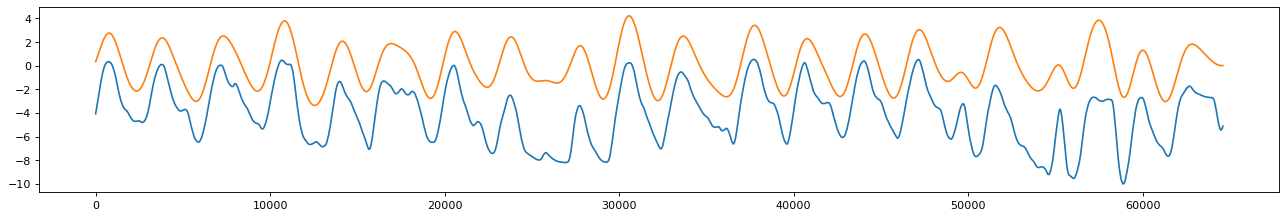

In [20]:
plt.figure(figsize=(20, 3), dpi=80)
gt = np.loadtxt(path_gt+"\Resp_Volts.txt")
plt.plot(gt)
b, a = butter(N=2, Wn=[0.1, 0.5], fs=fps_gt, btype='bandpass')
y = filtfilt(b, a, gt)
plt.plot(y)
plt.show()

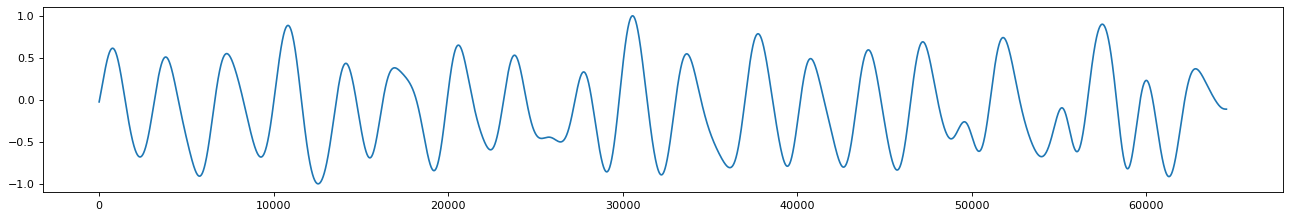

In [21]:
plt.figure(figsize=(20, 3), dpi=80)
y = (2*(y - np.min(y))) / (np.max(y) - np.min(y)) -1
plt.plot(y)
plt.show()

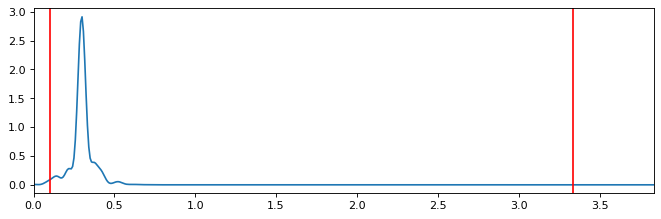

Max frequency: 0.3 Hz,  18.0 resp/min


In [22]:
plt.figure(figsize=(10, 3), dpi=80)
F, P = signal.welch(y, nperseg=win_size*fps_gt, noverlap=fps_gt*(win_size-1), fs=fps_gt, nfft=nFFT_gt)
plt.plot(F,P)
plt.axvline(x=0.1, ymin=0, ymax=1, c='r')
plt.axvline(x=maxF, ymin=0, ymax=1, c='r')
plt.xlim([0,maxF+0.5])
plt.show()
print("Max frequency:", F[np.argmax(P)], "Hz, ", F[np.argmax(P)]*60, "resp/min")

In [23]:
gt_sig = RWsignal(y, fps_gt, minHz=minF, maxHz=maxF) 

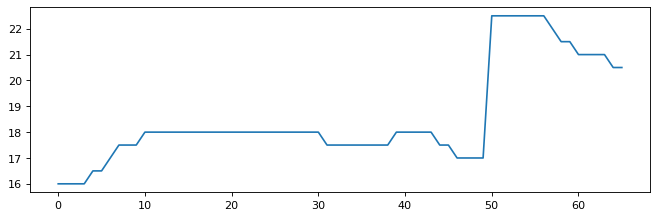

In [24]:
gt_rpm, gt_times = gt_sig.getRPM(winsize=27)
gt_rpm = signal.medfilt(gt_rpm, kernel_size=3)

plt.figure(figsize=(10, 3), dpi=80)
plt.plot(gt_rpm)
plt.show()

<b> Summary

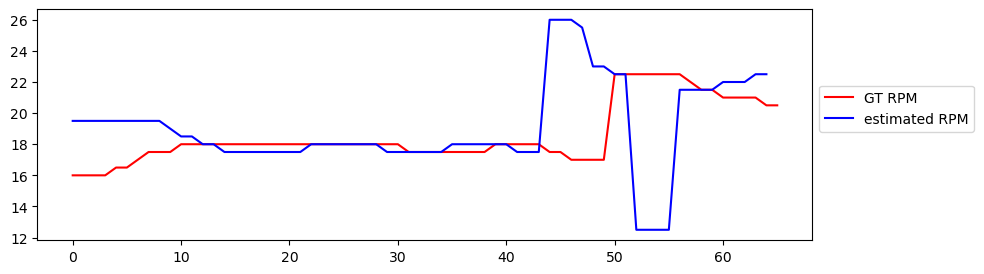

In [25]:
#figure(figsize=(10, 3), dpi=80)
plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
ax.plot(gt_times, gt_rpm, c='r', label='GT RPM')
ax.plot(times, rpm, c='b', label='estimated RPM')
leg = ax.legend(bbox_to_anchor =(1, 0.7))
plt.show()

In [26]:
padding = int(win_size//2)
gt_times = gt_times[padding:-padding-1]
gt_times-=gt_times[0]
times = times[padding:-padding]
times-=times[0]
rpm = rpm[padding:-padding]
gt_rpm = gt_rpm[padding:-padding-1]

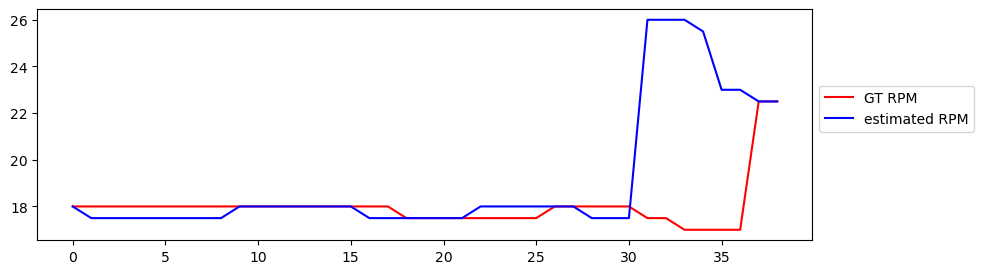

In [27]:
#figure(figsize=(10, 3), dpi=80)
plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
ax.plot(gt_times, gt_rpm, c='r', label='GT RPM')
ax.plot(times, rpm, c='b', label='estimated RPM')
leg = ax.legend(bbox_to_anchor =(1, 0.7))
plt.show()